# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
# Define an empty list to fetch the weather data for each city
city_data = []
#base_query = f"{url}appid={weather_api_key}"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+weather_api_key+"&q="+city+"&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pangkalanbuun
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | huanren
Processing Record 7 of Set 1 | fare
Processing Record 8 of Set 1 | oranjemund
Processing Record 9 of Set 1 | xichang
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | hammerfest
Processing Record 13 of Set 1 | margate
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | tambura
Processing Record 18 of Set 1 | kaka
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | bridlington
Processing Record 23 of Set 1 | chubbuck
Processing Record

Processing Record 39 of Set 4 | gimbi
Processing Record 40 of Set 4 | komsomolskiy
Processing Record 41 of Set 4 | kabanjahe
Processing Record 42 of Set 4 | batagay-alyta
Processing Record 43 of Set 4 | douai
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | hasaki
Processing Record 46 of Set 4 | mestia
Processing Record 47 of Set 4 | bukama
Processing Record 48 of Set 4 | hokitika
Processing Record 49 of Set 4 | notre-dame-du-lac
Processing Record 0 of Set 5 | yarovoye
Processing Record 1 of Set 5 | tura
Processing Record 2 of Set 5 | tuatapere
Processing Record 3 of Set 5 | mount darwin
Processing Record 4 of Set 5 | hofn
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | plouzane
Processing Record 7 of Set 5 | olinda
Processing Record 8 of Set 5 | ewa beach
Processing Record 9 of Set 5 | khatanga
Processing Record 10 of Set 5 | jieshi
Processing Record 11 of Set 5 | torrington
Processing Record 12 of Set 5 | samarai
Processing Record 1

Processing Record 28 of Set 8 | hamilton
Processing Record 29 of Set 8 | pisco
Processing Record 30 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 31 of Set 8 | bantry
Processing Record 32 of Set 8 | kytlym
City not found. Skipping...
Processing Record 33 of Set 8 | fortuna
Processing Record 34 of Set 8 | maniitsoq
Processing Record 35 of Set 8 | pangnirtung
Processing Record 36 of Set 8 | oshakati
Processing Record 37 of Set 8 | shenzhen
Processing Record 38 of Set 8 | bubaque
Processing Record 39 of Set 8 | bargal
City not found. Skipping...
Processing Record 40 of Set 8 | aklavik
Processing Record 41 of Set 8 | wattegama
Processing Record 42 of Set 8 | ramos arizpe
Processing Record 43 of Set 8 | mersing
Processing Record 44 of Set 8 | blenheim
Processing Record 45 of Set 8 | antofagasta
Processing Record 46 of Set 8 | gornozavodsk
Processing Record 47 of Set 8 | mae chan
Processing Record 48 of Set 8 | snasa
Processing Record 49 of Set 8 | erzin
Pro

Processing Record 17 of Set 12 | novobirilyussy
Processing Record 18 of Set 12 | prince rupert
Processing Record 19 of Set 12 | banepa
Processing Record 20 of Set 12 | istanbul
Processing Record 21 of Set 12 | el wasta
City not found. Skipping...
Processing Record 22 of Set 12 | manaure
Processing Record 23 of Set 12 | narsaq
Processing Record 24 of Set 12 | ushtobe
Processing Record 25 of Set 12 | neuquen
Processing Record 26 of Set 12 | willmar
Processing Record 27 of Set 12 | inongo
Processing Record 28 of Set 12 | gairo
Processing Record 29 of Set 12 | makambako
Processing Record 30 of Set 12 | olafsvik
Processing Record 31 of Set 12 | seoul
Processing Record 32 of Set 12 | guapore
Processing Record 33 of Set 12 | hlotse
Processing Record 34 of Set 12 | alofi
Processing Record 35 of Set 12 | mpika
Processing Record 36 of Set 12 | jalu
Processing Record 37 of Set 12 | vila
Processing Record 38 of Set 12 | ixtapa
Processing Record 39 of Set 12 | iranshahr
Processing Record 40 of Set 

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangkalanbuun,-2.6833,111.6167,23.16,97,99,1.10,ID,1675016593
1,mataura,-46.1927,168.8643,10.78,69,61,0.74,NZ,1675016593
2,busselton,-33.6500,115.3333,17.64,72,64,5.74,AU,1675016593
3,hermanus,-34.4187,19.2345,19.33,64,100,10.26,ZA,1675016345
4,rikitea,-23.1203,-134.9692,25.84,74,80,4.91,PF,1675016593


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangkalanbuun,-2.6833,111.6167,23.16,97,99,1.10,ID,1675016593
1,mataura,-46.1927,168.8643,10.78,69,61,0.74,NZ,1675016593
2,busselton,-33.6500,115.3333,17.64,72,64,5.74,AU,1675016593
3,hermanus,-34.4187,19.2345,19.33,64,100,10.26,ZA,1675016345
4,rikitea,-23.1203,-134.9692,25.84,74,80,4.91,PF,1675016593


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

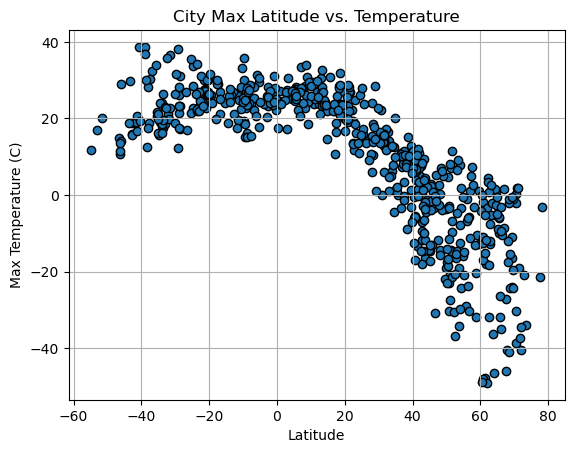

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.Lat,city_data_df["Max Temp"],edgecolors="Black")

plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

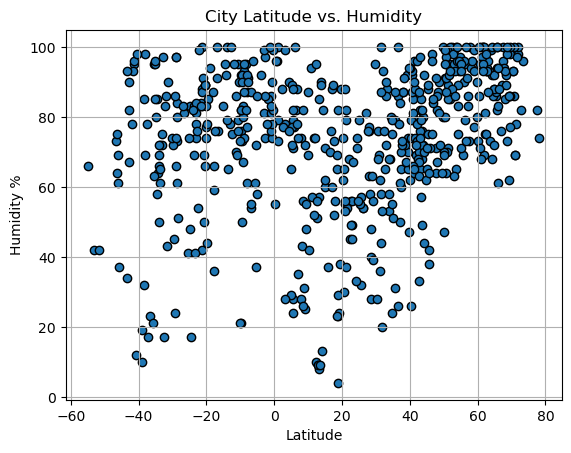

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.Lat,city_data_df.Humidity,edgecolors="Black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

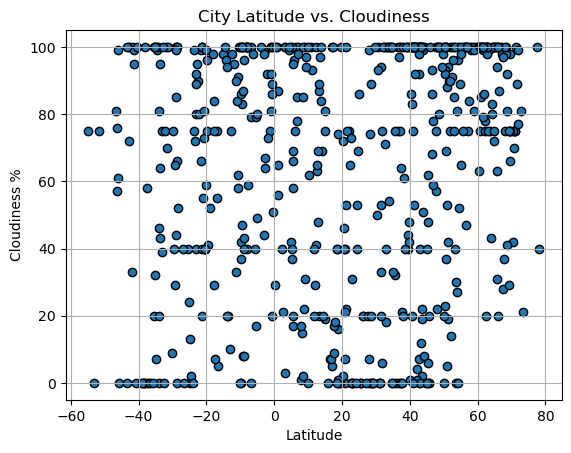

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.Lat,city_data_df.Cloudiness,edgecolors="Black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

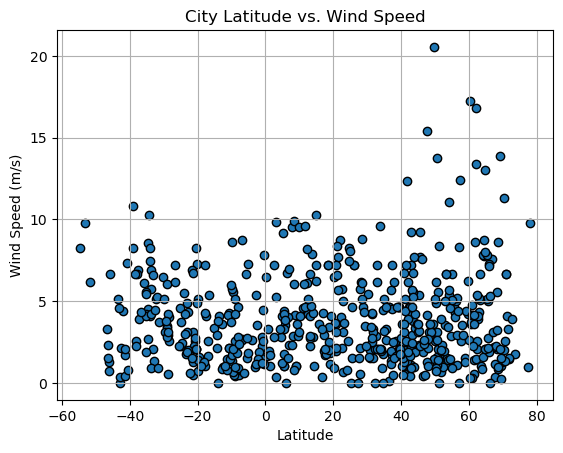

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df.Lat,city_data_df["Wind Speed"],edgecolors="Black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,huanren,41.2647,125.3667,-13.26,96,53,0.53,CN,1675016594
8,xichang,27.8964,102.2634,5.92,76,0,0.57,CN,1675016594
11,hammerfest,70.6634,23.6821,0.25,86,75,2.57,NO,1675016595
12,margate,51.3813,1.3862,7.17,89,94,1.79,GB,1675016578
13,georgetown,5.4112,100.3354,26.96,79,20,1.03,MY,1675016574


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangkalanbuun,-2.6833,111.6167,23.16,97,99,1.10,ID,1675016593
1,mataura,-46.1927,168.8643,10.78,69,61,0.74,NZ,1675016593
2,busselton,-33.6500,115.3333,17.64,72,64,5.74,AU,1675016593
3,hermanus,-34.4187,19.2345,19.33,64,100,10.26,ZA,1675016345
4,rikitea,-23.1203,-134.9692,25.84,74,80,4.91,PF,1675016593


###  Temperature vs. Latitude Linear Regression Plot

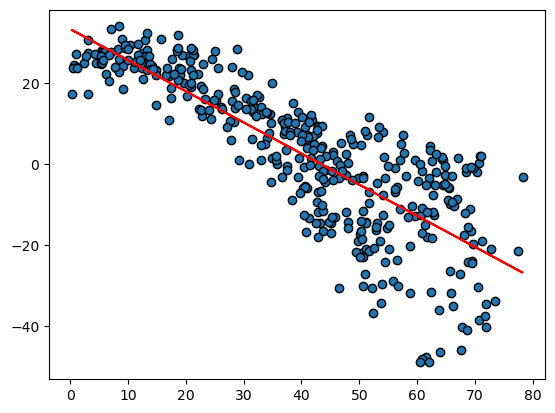

In [33]:
# Linear regression on Northern Hemisphere
xnlatitude= northern_hemi_df['Lat']
ytemperature= northern_hemi_df['Max Temp']

(slope,intercept,rvalue,pvalue,stderr) = linregress(xnlatitude,ytemperature)
regresslin = xnlatitude*slope+intercept

plt.scatter(northern_hemi_df.Lat,northern_hemi_df['Max Temp'],edgecolors="Black")
plt.plot(xnlatitude,regresslin,"r-")

northern_hemi_df.plot

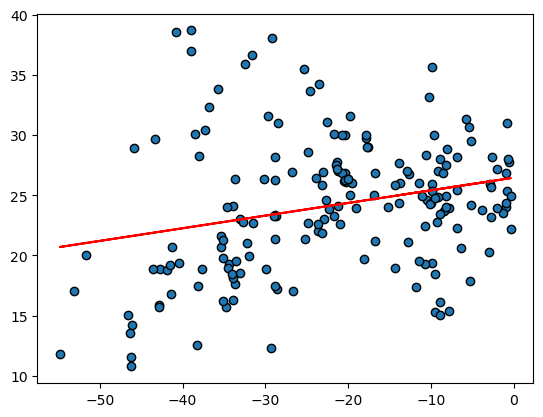

In [34]:
# Linear regression on Southern Hemisphere
xslatitude= southern_hemi_df['Lat']
ystemperature= southern_hemi_df['Max Temp']

(slope,intercept,rvalue,pvalue,stderr) = linregress(xslatitude,ystemperature)
regresslin = xslatitude*slope+intercept

plt.scatter(southern_hemi_df.Lat,southern_hemi_df['Max Temp'],edgecolors="Black")
plt.plot(xslatitude,regresslin,"r-")

southern_hemi_df.plot

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

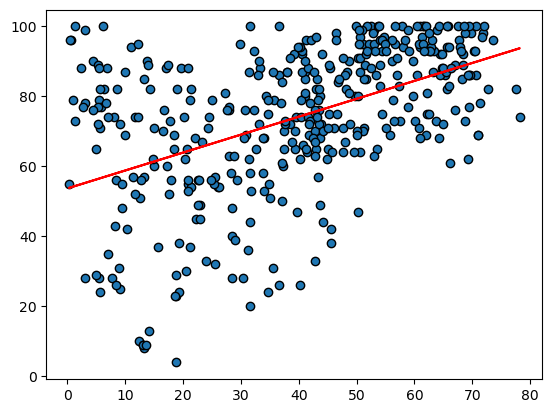

In [35]:
# Northern Hemisphere
xnlatitude= northern_hemi_df['Lat']
ynhumidity= northern_hemi_df['Humidity']

(slope,intercept,rvalue,pvalue,stderr) = linregress(xnlatitude,ynhumidity)
regresslin = xnlatitude*slope+intercept

plt.scatter(xnlatitude,ynhumidity,edgecolors="Black")
plt.plot(xnlatitude,regresslin,"r-")

northern_hemi_df.plot

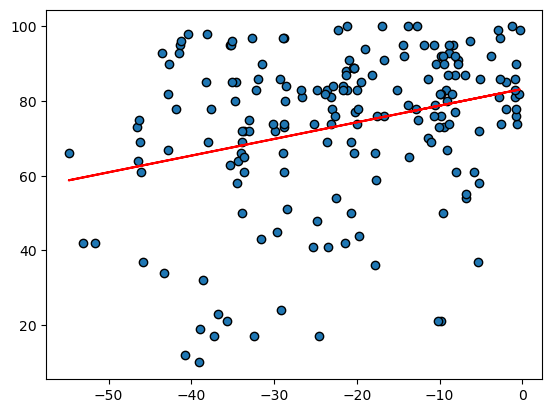

In [36]:
# Southern Hemisphere
xslatitude= southern_hemi_df['Lat']
yshumidity= southern_hemi_df['Humidity']

(slope,intercept,rvalue,pvalue,stderr) = linregress(xslatitude,yshumidity)
regresslin = xslatitude*slope+intercept

plt.scatter(xslatitude,yshumidity,edgecolors="Black")
plt.plot(xslatitude,regresslin,"r-")

southern_hemi_df.plot

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

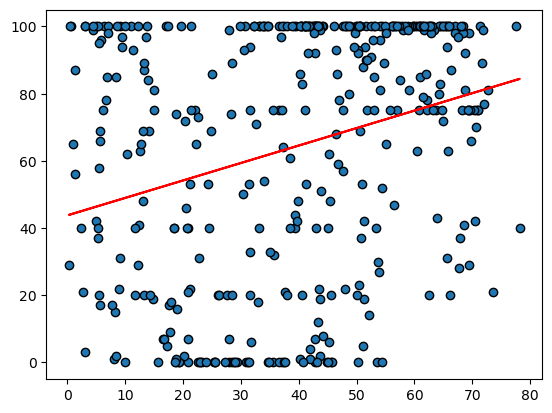

In [37]:
# Northern Hemisphere
xnlatitude= northern_hemi_df['Lat']
yncloudiness= northern_hemi_df['Cloudiness']

(slope,intercept,rvalue,pvalue,stderr) = linregress(xnlatitude,yncloudiness)
regresslin = xnlatitude*slope+intercept

plt.scatter(xnlatitude,yncloudiness,edgecolors="Black")
plt.plot(xnlatitude,regresslin,"r-")

northern_hemi_df.plot

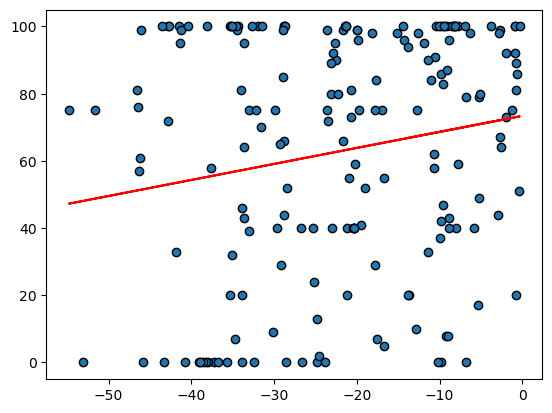

In [38]:
# Southern Hemisphere
xslatitude= southern_hemi_df['Lat']
yscloudiness= southern_hemi_df['Cloudiness']

(slope,intercept,rvalue,pvalue,stderr) = linregress(xslatitude,yscloudiness)
regresslin = xslatitude*slope+intercept

plt.scatter(xslatitude,yscloudiness,edgecolors="Black")
plt.plot(xslatitude,regresslin,"r-")

southern_hemi_df.plot

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

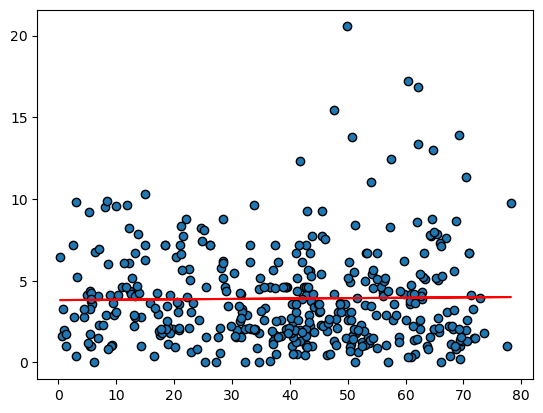

In [39]:
# Northern Hemisphere
xnlatitude= northern_hemi_df['Lat']
ynwindspeed= northern_hemi_df['Wind Speed']

(slope,intercept,rvalue,pvalue,stderr) = linregress(xnlatitude,ynwindspeed)
regresslin = xnlatitude*slope+intercept

plt.scatter(xnlatitude,ynwindspeed,edgecolors="Black")
plt.plot(xnlatitude,regresslin,"r-")

northern_hemi_df.plot

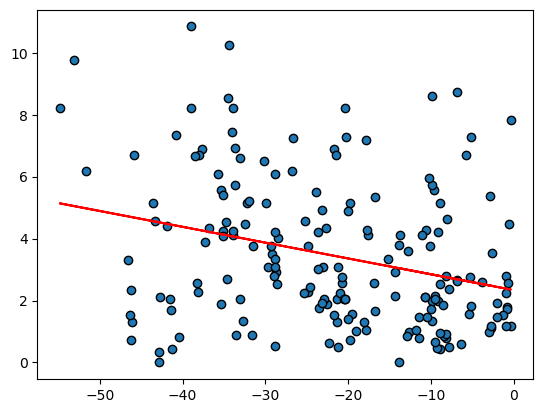

In [40]:
# Southern Hemisphere
xslatitude= southern_hemi_df['Lat']
yswindspeed= southern_hemi_df['Wind Speed']

(slope,intercept,rvalue,pvalue,stderr) = linregress(xslatitude,yswindspeed)
regresslin = xslatitude*slope+intercept

plt.scatter(xslatitude,yswindspeed,edgecolors="Black")
plt.plot(xslatitude,regresslin,"r-")

southern_hemi_df.plot

**Discussion about the linear relationship:** YOUR RESPONSE HERE